# Predict Country’s GDP by its Flag

## Introduction

Every country has a flag that represents and symbolizes the nation. It is typically designed with specific meaning for its colors and symbols that are associated with the history, traditions, geography, political system, and the religion of the country. Therefore, often just by looking at the flag of a country we can say something about its life and about its citizens. For example, it is well known that having green color combined with a crescent moon indicates that the country is Islamic. Also, many countries with warm southern climate have yellow or orange on their flags that is designed to symbolize the sun, or the image of the sun itself. Blue often indicates the proximity to a sea or an ocean. 

All these facts are known. But can we go further? Is it possible to take the next step and try to derive, for instance, economic indicators, such as GDP of a country, from the image of a flag? 

This task doesn't seem impossible, if we think about it. 

We know that European or North American countries, for instance, on average are wealthier than African or South American ones. At the same time, the fact that a country is located on a certain continent can be reflected on its flag. Similarly, older and more stable states tend to be more prosperous than younger states, and information about the age of a state can often be obtained from its flag also. This may be evidenced, for example, by the presence of crosses or coats of arms, which rarely can be found on the flags of younger states. 

Thus, using the image of a flag as an indirect source of information about the geographical location and other facts associated with a country, can we predict economic indicators of this country using machine learning algorithms? Will these algorithms be able to extract enough information from the flag to make accurate predictions? 

The purpose of this research is test our intuition and find out whether it is possible to predict a country's GDP per capita using machine learning algorithms, and if so, what accuracy can we expect. 

We will use World Flags 2024 dataset as our input data. 

At the end of each section there will be a link to the source code that was used to obtain the corresponding data.

## Dataset

Let's examine the dataset that we have first. 

It has general information about 193 UN countries such as: population, religion, geographical location, some economic indicators and other. We will only be interested in the information about country flags.

The dataset has the following information:
1. Whether or not a flag contain a specific color.
2. Direction of stripes a flag is made of (vertical, horizontal, etc.).
3. Whether or not a flag has special symbols (canton, stars, sun, blazon, etc.).
4. Aspect ratio.

There are 24 columns that we are interested in in total. All of the information is presented in Boolean form except for the Aspect Ratio column. These columns will be used as features.

The GDPPerCapita column has the target values. 

### Visualization

Let's draw some graphs to get a better feeling about the data we a dealing with.

First, let's see which are the most common flag colors. For that, we can draw a bar plot that shows how many flags have each of the colors (Figure 1). 

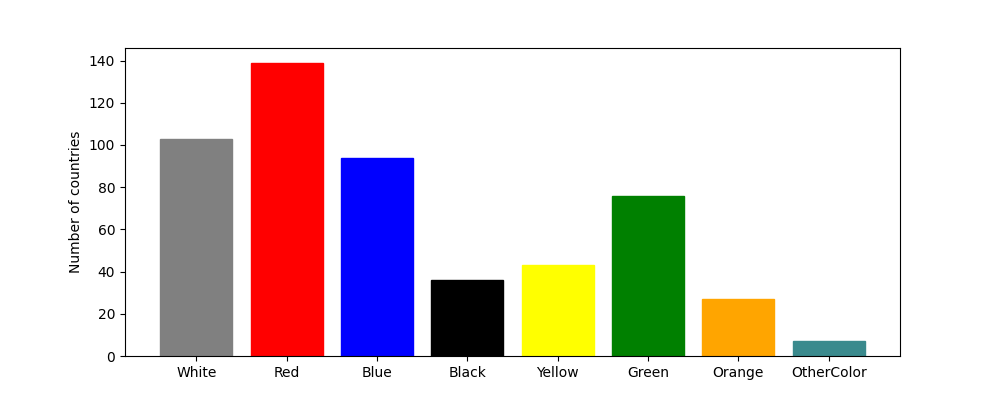

*<center>Figure 1. - Flag colors.</center>*

We can see that red is the most popular color. It can be found on 139 of 193 flag. Other popular colors are blue, green, and white. 

Only a few flags contain a color outside of the seven most common ones. [Source code](https://github.com/apnoorex/GDP-from-Flag-Article/blob/main/color_counts_plot.py)

Next, let's examine the aspect ratios (Figure 2).

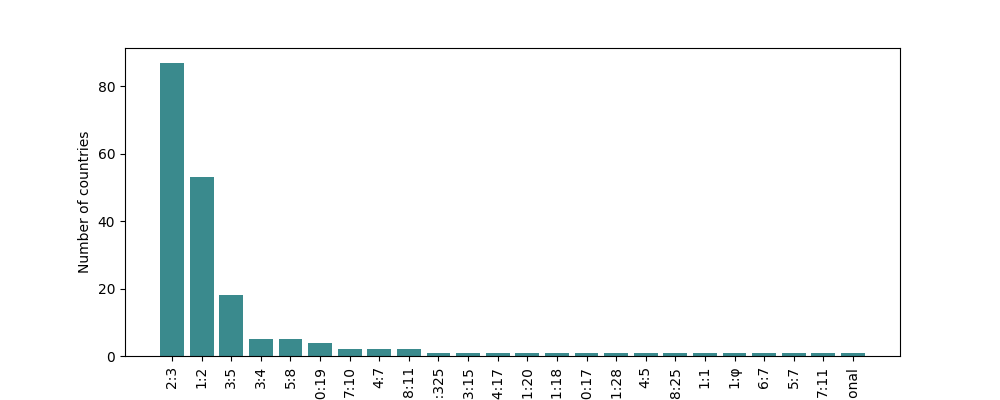

*<center>Figure 2. - Aspect ratios.</center>*

Most flags have a ratio of 1:2, 2:3 or 3:5 that appear to be the standard. At the same time, there are quite a few flags that have a rare aspect ratio, including 15 countries that have a unique flag size, forming a category of its own. [Source code](https://github.com/apnoorex/GDP-from-Flag-Article/blob/main/aspect_ratios_plot.py)

Flags can also contain a special symbol (Figure 3). 

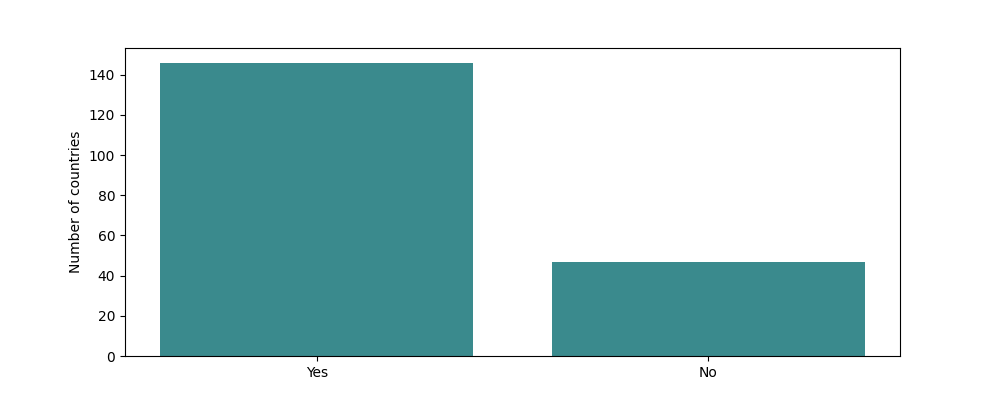

*<center>Figure 3. - Flags with special symbols on them.</center>*



It can be anything: a star or stars, a cross, a blazon, the sun, etc. We can see from the plot that 146 countries have some sort of an additional image on their flags and 47 don't. [Source code](https://github.com/apnoorex/GDP-from-Flag-Article/blob/main/special_symbols_counts_plot.py)

Finally, let's see how many different colors it is common to have on a flag (Figure 4).

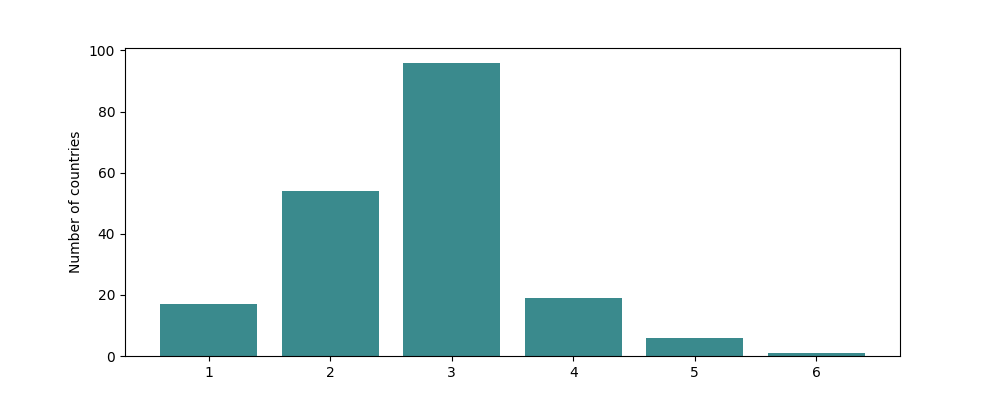

*<center>Figure 4. - Number of different colors on a flag.</center>*

We can see that flags usually have two or three different colors on them. This represents the total number of different colors and doesn't include multiple stripes of the same color. For instance, the flag of the United States is counted as having three colors. [Source code](https://github.com/apnoorex/GDP-from-Flag-Article/blob/main/number_of_different_colors_plot.py)

Note: Column OtherColor does not clearly state if it is only one color outside of the seven most common ones, or multiple colors, each of which is unique. In this work we will count it as one color that is not among common ones.

Now that we have more idea about the dataset, let's try to visualize some of the patterns mentioned in the introduction section.

### Correlations

First, let's create a graph that has information about when was the time a flag had changed for the final time (Figure 5). For that we a going to use the LatestAdoption column from the original dataset.

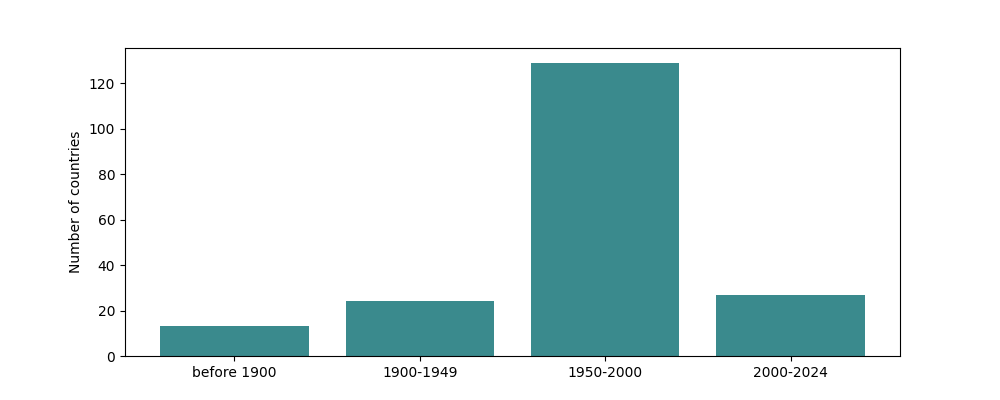

*<center>Figure 5. - The latest adoption date.</center>*

We can see that most of the World flags have changed in the second half of the 20th century. Only 13 countries haven't changed their national flag after the 19th century. [Source code](https://github.com/apnoorex/GDP-from-Flag-Article/blob/main/latest_adoption_plot.py)

Next, for the sake of experiment, we can find out flags of countries of which continents have vertical stripes on them (Figure 6).

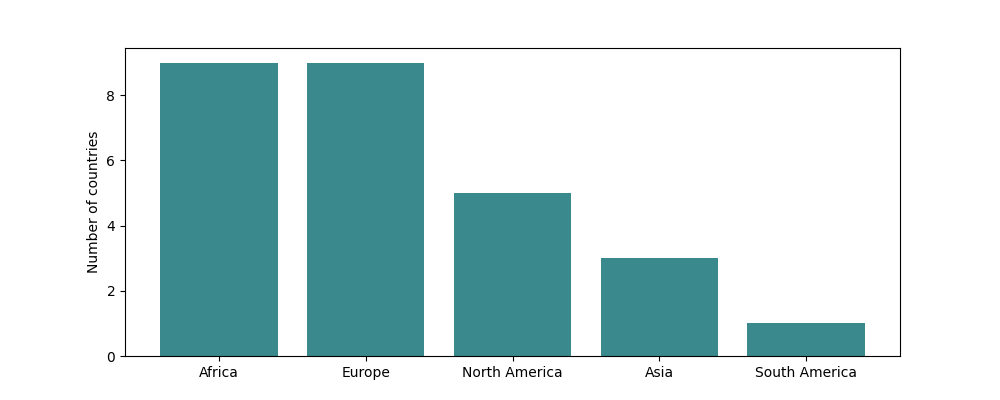

*<center>Figure 6. - Vertical stripes per continent.</center>*

We can see that most flags that have the stripes positioned vertically represent Africa and Europe. Only one of such countries is located in South America. [Source code](https://github.com/apnoorex/GDP-from-Flag-Article/blob/main/vertical_stripes_by_continent_counts_plot.py)

Perhaps we can think of some more patterns that can be observed:
- There are 11 flags that have a cross on them, 10 of them represent European countries (mostly Northern Europe). [Source code](https://github.com/apnoorex/GDP-from-Flag-Article/blob/main/has_cross.py)
- Seven flags contain a circle, five of those countries are located in Asia. [Source code](https://github.com/apnoorex/GDP-from-Flag-Article/blob/main/has_circle.py)
- Sixteen flags have red, white, and black color simultaneously, 13 of them are in either Africa or Asia. [Source code](https://github.com/apnoorex/GDP-from-Flag-Article/blob/main/white_red_black_by_continent_counts.py)

## Intermediate conclusion

From the graphs we can see that the data that we have is definitely categorizable and can be used to built machine learning models. We have only studied a few of the possible patterns that can be found, but that was not the goal of our research. Having got some intuition, we want the machine learning algorithms to take over.

In the following section we will built a model, fit it with the data and try to make some accurate predictions.

## Prediction

First we need to decide which machine learning algorithm to use. We, obviously, want the one that suits our dataset best.

Most of the data (except for one column) is in Boolean form. That actually looks like a perfect situation for tree based machine learning algorithms. So, let’s try one of those. Specifically, we will be using Gradient Boosting Regressor from Scikit-learn library.

### Data preprocessing

Before we proceed to building our model, let’s create a couple of additional columns of data based on the data we already have. We will add the following new features:
- AspectRatio column categorized to have these values: 1:2, 2:3, 3:5, and Other.
- Total colors that a flag has.
- Total number of features (blazons, crosses, birds, stars, etc) plus the total number of color on a flag.

Some countries don’t have a GDP per capita information. Zero value is used in the dataset to indicate that. We will not use those countries in our training. We will also not consider countries with population less than 100,000 people as it seems to be a potential source of outliers that will make it more difficult to train our model.

In addition, we will remove the Crescent column. The minimum GDP per capita value for countries that have a crescent on their flag is 1,374, max value: 82,619, mean value: 11,341. These number represent a pretty wide range and are very close to the corresponding values for the whole dataset (1,011, 125,935, 18,126 respectively), therefore the column is probably not very distinctive. We will not be using it. [Source code](https://github.com/apnoorex/GDP-from-Flag-Article/blob/main/muslim_countries_ranges.py)

Finally, we need to split the data into two portions: training data and testing data, keeping some countries aside to used them for validation of the model later.

Now we are all set. The code that is used to built the model can be found [here](https://github.com/apnoorex/GDP-from-Flag-Article/blob/main/XGBoost_regression.py).

### Performance evaluation method

Mean Absolute Error metric that measures the average absolute difference between the actual and predicted values will be used to evaluate the accuracy of predictions.

### Regression

The actual and predicted result for the countries in the testing portion of the data are presented in Table 1.

Table 1 – Prediction results.

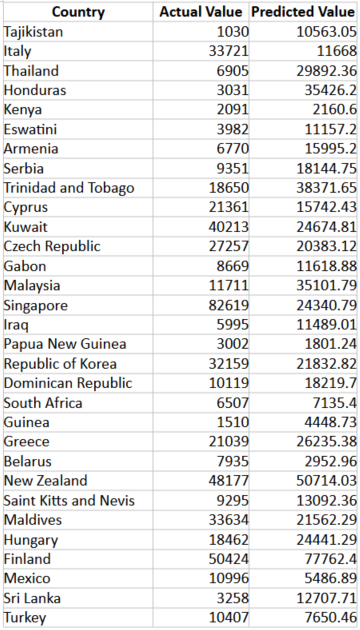

The table shows that for many countries the match is close to perfect, although errors (including pretty substantial ones) are certainly present. At the same time, the MAE is 11,384, which doesn’t look all that terrible considering the small size of the dataset that on top of that implies inevitable errors. For instance, Ireland and Côte d’Ivoire have practically the same flag, but their GDP per capita indicators differ by almost 45 times (103,570 and 2,304 respectively). Therefore, we have every reason to consider our investigation a success.

### Classification

However, before proceeding to the conclusion, perhaps, we can perform just one more experiment.

Let’s put the countries into four categories depending on their GDP per capita indicator and try to predict that category instead of the absolute value of the GDP per capita.

Let’s have the following categories:
- under 25k, 
- 25k - 50k, 
- 50k - 75k,
- over 75k. 
In this case we can use Gradient Boosting Classifier as our model. The input data will stay exactly the same.

The source code for this experiment can be found [here](https://github.com/apnoorex/GDP-from-Flag-Article/blob/main/XGBoost_classification.py).

The accuracy of the model is 74%. The percentage represent the number of countries that we have classified correctly.

Again, considering the weaknesses of the dataset, this result can be considered very good.

## Conclusion

We can state that the task of predicting a country’s GDP per capita by its flag, admitting all the shortcomings and limitations, is definitely feasible.

At the same time, we should note that the model we have built is very situational. As we know, GDP can change drastically with time for individual countries or regions, as well as for the whole world.

It is very possible that in a few years this model will not be able to produce such results. Maybe this will happen because GDP in all countries will be equally high.

At least, the author of this article hopes for that.